In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Loading data
Train data and test data are uploaded to the notebook

In [4]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Now we can explore the different columns to get a sense of how much data is missing. We can sum up all the null values in the different columns.  
We should recall that the train data has 1460 rows. We use a heatmap to get a sense of how much data is missing.

<Axes: >

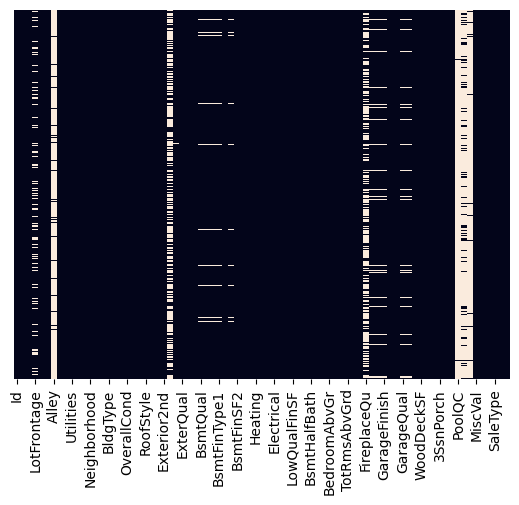

In [7]:
import seaborn as sns
sns.heatmap(train_data.isnull(), cbar=False, yticklabels=False)

In [9]:
null_list = train_data.isnull().sum()
# Index and values are converted to list to print them
index = list(null_list.index)
values = list(null_list)


for idx, value in zip (index, values):
    print(f"{idx}: {value}")

Id: 0
MSSubClass: 0
MSZoning: 0
LotFrontage: 259
LotArea: 0
Street: 0
Alley: 1369
LotShape: 0
LandContour: 0
Utilities: 0
LotConfig: 0
LandSlope: 0
Neighborhood: 0
Condition1: 0
Condition2: 0
BldgType: 0
HouseStyle: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
RoofStyle: 0
RoofMatl: 0
Exterior1st: 0
Exterior2nd: 0
MasVnrType: 872
MasVnrArea: 8
ExterQual: 0
ExterCond: 0
Foundation: 0
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinSF1: 0
BsmtFinType2: 38
BsmtFinSF2: 0
BsmtUnfSF: 0
TotalBsmtSF: 0
Heating: 0
HeatingQC: 0
CentralAir: 0
Electrical: 1
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
BsmtFullBath: 0
BsmtHalfBath: 0
FullBath: 0
HalfBath: 0
BedroomAbvGr: 0
KitchenAbvGr: 0
KitchenQual: 0
TotRmsAbvGrd: 0
Functional: 0
Fireplaces: 0
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageCars: 0
GarageArea: 0
GarageQual: 81
GarageCond: 81
PavedDrive: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorch: 0
ScreenPorch: 0
Po

We can see a big number of missing values in some columns (like MiscFeature or PoolQC). With this information, we can discard columns with a high ratio of missing values. The threshold I'm gonna take for this analysis is 50%. In other words, if ```50%``` of the data is missing, the column is eliminated from the training data. Additionally, a copy of the original dataframe will be made.

In [10]:
# Exploring columns with high amount of missing values. Eliminating columns
df_train = train_data.copy()

n = len(df_train)
threshold = 0.5

for idx, value in zip (index, values):
    ratio = value/n
    if ratio >= threshold:
        # print(f"{ratio} - {idx}: {value}")
        # The column is dropped
        df_train = df_train.drop(idx, axis=1)
        
#The column "id" is also eliminated because it doesn't give any valuable information
df_train = df_train.drop("Id", axis=1)

df_train.shape


(1460, 75)

Now we can build another heatmap to see how the data has been cleaned.

<Axes: >

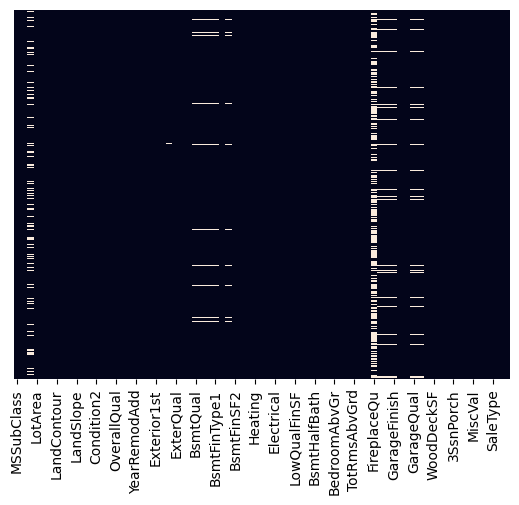

In [11]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)

The next step is to deal with categorical and numerical values and come up with some kind of compromise to fill the remaining Null values in the previous heatmap. The criteria will depend on the particular column. The data type in each column gives us information about the whether the variable is categorical or not. a Dtype "object" indicates the variable is categorical.

In [82]:
# df_train.info()

The objective now is to develop a function to be used to treat categorical and numerical variables and fill the null values. Let's explore how we can treat a categorical variable first. The method ``value_counts()`` can be used to count how many times each category is repeated for in a column.
It is important to note that this method doesn't count the missing values.

In [12]:
print(df_train["BsmtCond"].value_counts())
print()
print(df_train["BsmtCond"])
print()
print(f"If the variable is categorical, its dtype is: {df_train['BsmtCond'].dtype}")
print(f"The number of null values is: {len(df_train)- df_train['BsmtCond'].value_counts().sum()}")
print(f"The sum of all teh categorical values is: { df_train['BsmtCond'].value_counts().sum()}")
print(f"mode: { df_train['BsmtCond'].mode()[0]}")

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

0       TA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: BsmtCond, Length: 1460, dtype: object

If the variable is categorical, its dtype is: object
The number of null values is: 37
The sum of all teh categorical values is: 1423
mode: TA


We continue to explore how to use a couple of pandas methods to fill the missing values in columns.

In [13]:
df2 = df_train.copy()
df2 = df_train["BsmtCond"].fillna(df_train['BsmtCond'].mode()[0])
print(df2.info)

print(np.sum(df2 == df_train["BsmtCond"]))

<bound method Series.info of 0       TA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: BsmtCond, Length: 1460, dtype: object>
1423


The function should accept a dataframe, iterate through each column and: 
- Verify the data type of the column.
- If its type is "object" or "int64", we use the method value_counts and fill the missing values with the "mode" for that column.

- else if: the value is of type "float64", we fill the missing value with the mean for that particular column.  
**note:** Some variables that are float, like ``MSSubClass``, are actually categorical and using the mean value would create a new value which doesn't correspond to any of the possible values.

In [14]:
def fill_missing(dataFrame):
    """ This function iterates through the columns of data frame. If the column dtype is 'int64' or 'object'
    the variable is considered categorical, the missing values are filled with the 'mode' of that category. 
    If the dtype is 'float64', the variable is numerical and the missing values are filled with the mean value.
    """
    for col in dataFrame:
        if dataFrame[col].dtype == "object" :  # Categorical features - fill the mode value
            dataFrame[col] = dataFrame[col].fillna(dataFrame[col].mode()[0])
        elif dataFrame[col].dtype == "float64" or dataFrame[col].dtype == "int64":  # Numerical  features - fill with the mean value
            dataFrame[col] = dataFrame[col].fillna(dataFrame[col].mean())

fill_missing(df_train)

Number of Null variables in the dataframe: 0


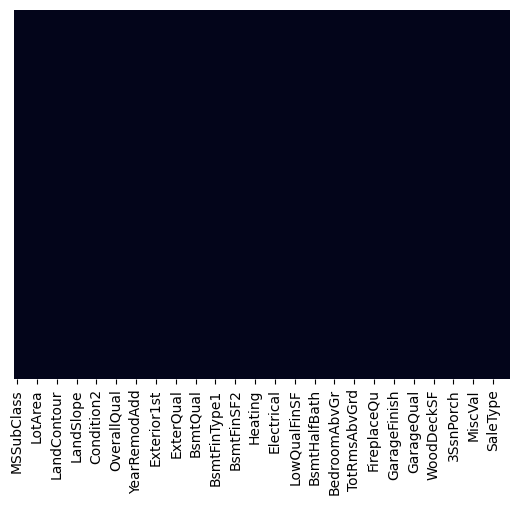

In [15]:
# We can visualize a heatmap again to find out that we have less Null values
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)

# Additionally, we can observe how many Null values are present after the treatment
print(f"Number of Null variables in the dataframe: {df_train.isnull().sum().sum()}")

### Dealing with categorical variables
To build a machine learning algorithm it is of great interest to convert the categorical variables using the one-hot encode technique. For this purpose, we're creating a function that iterates through the dataframe columns and one-hot encode the variables of type 'object'.


In [16]:
# The target column SalePrice is saved and dropped from the dataframe
train_y = df_train["SalePrice"]
df_train = df_train.drop("SalePrice", axis=1)

In [17]:
# HAY QUE MEJORAR EL DATAFRAME DE ENTRADA df_train PORQUE ALGUNAS VARIABLES ENTERAS NO TIENE SENTIDO QUE SEAN CATEGORICAS
# COMO EL AÑO DE CONSTRUCCION, POR EJEMPLO...


def one_hot_encode(dataFrame):
    new_df = pd.DataFrame()
    for col in dataFrame:
        if (dataFrame[col].dtype == "object") :  # Categorical features
            new_cols = pd.get_dummies(dataFrame[col], prefix=col)  # saved in a dataframe 
            # new_cols = pd.get_dummies(dataFrame[col])
            new_df = pd.concat([new_df, new_cols], axis=1)
        else:          
            new_df = pd.concat([new_df, dataFrame[col]], axis=1)  # Float64 and int64 features

    return new_df



## Working with the test_data
I saw in a video that applying the same treatment to the test data produces a dataFrame with a different number of encoded columns.  
In order to avoid this problem, the strategy will be to treat the ``test_data`` in the same way as the ``trainging_data``, concatenate both data frames and then pass the concatenated data frame to the ``one_hot_encode`` function. 

In [18]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Eliminating null values
first we make a copy of the test_data and make a heatmap to visualize the null values.

<Axes: >

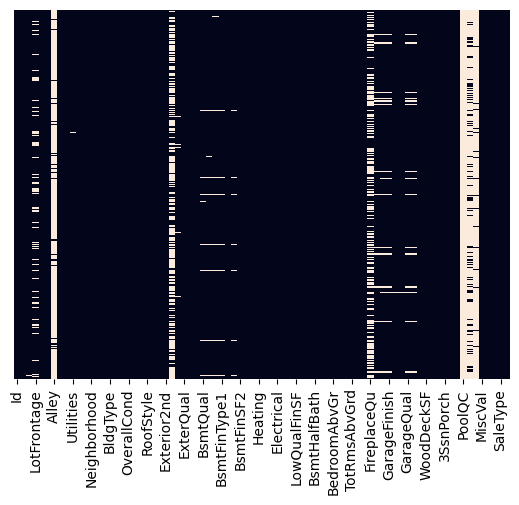

In [19]:
sns.heatmap(test_data.isnull(), cbar=False, yticklabels=False)

Next, we apply the same procedure we used for the train data to eliminate the null values.

In [20]:
# Exploring columns with high amount of missing values. Eliminating columns
df_test = test_data.copy()

null_list = df_test.isnull().sum()
# Index and values are converted to list to print them
index = list(null_list.index)
values = list(null_list)

n = len(df_test)
threshold = 0.5

for idx, value in zip (index, values):
    ratio = value/n
    if ratio >= threshold:
        # print(f"{ratio} - {idx}: {value}")
        # The column is dropped
        df_test = df_test.drop(idx, axis=1)
        
#The column "id" is also eliminated because it doesn't give any valuable information
df_test = df_test.drop("Id", axis=1)

df_test.shape

(1459, 73)

The function fill_missing is used next:

(1459, 73)


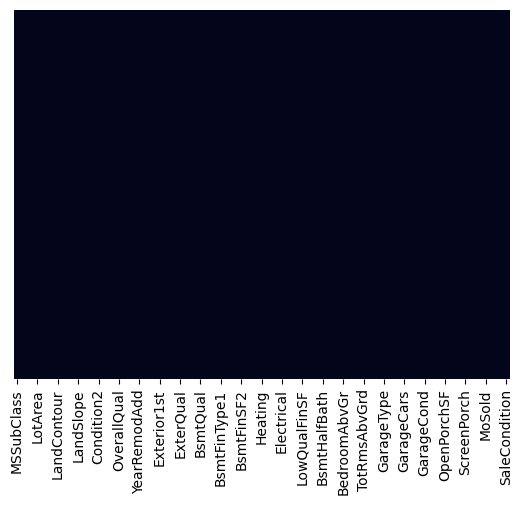

In [21]:
fill_missing(df_test)

# We can visualize the result with a heatmap
sns.heatmap(df_test.isnull(), cbar=False, yticklabels=False)
print(df_test.shape)

### Joining both data frames
The next step is to join the training and test dataframes and use the function ``one_hot_encode`` over the resulting dataframe

In [22]:
print(df_train.shape, df_test.shape)


(1460, 74) (1459, 73)


As we can see, there are differences in the number of columns in the train and test dataframes. Let's find out what feature is different.

In [23]:
for element in df_train.columns:
    if element not in df_test.columns:
        notPresent = element

print (f"The non repeated column is: {notPresent}. This column is present in the train data frame but not in the test dataframe")

# print(df_train["FireplaceQu"])

The non repeated column is: FireplaceQu. This column is present in the train data frame but not in the test dataframe


However, this variable was removed from the test data, because of small variations in the total amount of null values for this column in both dataframes. The criteria we'll be using is the following:  

The columns in the df_test must match the columns in the df_train. Therefore, we're just adding back the column ``FireplaceQu`` to the df_test

In [24]:
df_test = pd.concat([df_test, test_data["FireplaceQu"]], axis=1)
print(df_test.shape)

(1459, 74)


With this treatment, we have the same columns for both the train and test datasets. We can see the shapes of all the key data frames below:

In [25]:
print(df_train.shape, df_test.shape)

# The dataframes are concatenated
total_df = pd.concat([df_train, df_test], axis=0)


(1460, 74) (1459, 74)


Now we use the one-hot-encode function

In [26]:
encoded_df = one_hot_encode(total_df)
print(encoded_df.shape)

(2919, 271)


The elimination of duplicate columns is the final step in Data analysis

In [27]:
print(encoded_df.head())
# I want to know what columns are the duplicated
pos_dup = encoded_df.columns.duplicated().tolist()
# print(pos_dup.tolist())
df_filtered = encoded_df.loc[:, pos_dup]
print(df_filtered.head())
# print(df_filtrado.shape)

   MSSubClass  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0          60             False        False        False         True   
1          20             False        False        False         True   
2          60             False        False        False         True   
3          70             False        False        False         True   
4          60             False        False        False         True   

   MSZoning_RM  LotFrontage  LotArea  Street_Grvl  Street_Pave  ...  \
0        False         65.0     8450        False         True  ...   
1        False         80.0     9600        False         True  ...   
2        False         68.0    11250        False         True  ...   
3        False         60.0     9550        False         True  ...   
4        False         84.0    14260        False         True  ...   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1   

The inclusion of a prefix in the one hot encoded dataframe avoids the incorrect elimination of columns of differente categories that may seem duplicates, but are not.

At this point we have concluded the treatment of the training and data sets. Now, we're separating the dataframe again into training, cross validation and test sets and start applying some kind of machine learning algorithm to make our predictions.


## Building a Machine Learning Model

At this point we can regenerate the training and test data sets from the encoded data frame.

In [28]:
df_train = encoded_df.iloc[:1460,:]
df_test = encoded_df.iloc[1460:,:]
print(df_train.shape, df_test.shape)

(1460, 271) (1459, 271)


The XGBoost (eXtreme Gradient Boosting) algorithm is implemented below.

In [29]:
import xgboost as xgb

classifier = xgb.XGBRegressor()
classifier.fit(df_train, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
y_pred = classifier.predict(df_test)
print(y_pred.shape)

(1459,)


Finally, lets build the submission file.

In [32]:
# A new data frame is created
output = pd.DataFrame({"Id": test_data["Id"], "SalePrice":y_pred})

# The file is created and saved
output.to_csv("HousingPriceSubmission.csv", index=False)